# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,clicks,orders,user_id
0,163,2,1
1,130,4,2
2,97,0,3


In [3]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [4]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [5]:
df['watcher'] = df['orders'].apply(watcher)
df

,calculated,clicks,orders,user_id,watcher
0,False,163,2,1,False
1,False,130,4,2,False
2,True,97,0,3,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [6]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [7]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

0    0.01227
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [8]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [9]:
df['conversion'] = df.apply(conversion, axis=1)

In [10]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


### Как создавать столбцы с помощью функций

In [15]:
df = pd.DataFrame({'user_id': [1, 2, 3, 2]})

In [16]:
df

,user_id
0,1
1,2
2,3
3,2


In [17]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [18]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0
3,NaN,1.0,NaN


### Анализ рекламных кампаний

In [19]:
import pandas as pd

In [20]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [21]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [22]:
phrase = 'МРТ на Менделеевской от 2000'

In [23]:
len(phrase.split(' '))

5

In [24]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [25]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [26]:
%matplotlib inline

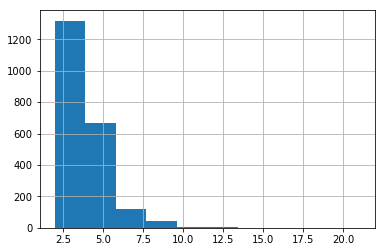

In [27]:
stats['word_count'].hist()

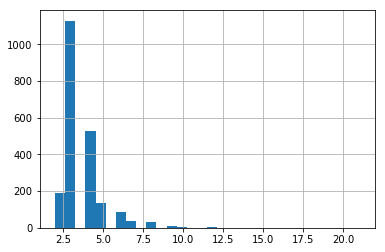

In [28]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [29]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [30]:
from urllib import parse

In [31]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='abc')

In [32]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [33]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [34]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [35]:
params = parse.parse_qs(parsed.query)
params

{'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}'],
 'utm_medium': ['cpc'],
 'utm_source': ['yandex']}

In [36]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [37]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [38]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [39]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [40]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [41]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [42]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

# Группировки

In [43]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,amount,category,country,order_id
0,100,Электроника,Россия,1
1,80,Авто,Китай,2
2,90,Электроника,Китай,3
3,140,Авто,Россия,4
4,90,Авто,Россия,5


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

Объединим процесс разбиения на датафреймы

In [44]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [45]:
df.groupby('country').apply(groupby_function)

country
Китай     10
Россия    50
dtype: int64

Вернемся к статистике рекламных кампаний

In [46]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [47]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [48]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


### Как вернуть столбец из индекса - метод reset_index()

In [49]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


### К группировке можно применять разные функции такие образом:

In [50]:
obj = stats.groupby('campaign')

In [51]:
obj.max().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,в недорого москва мрт,в москве открытого типа адрес мрт -цена,9.0,2428554779,Адрес МРТ открытого типа в Москве,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,7,729.000
03fcaecd1d,сделать мрт сущевский вал,сделать мрт стромынка,6.5,2101705759,Сделайте МРТ на ул. Стромынка!,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,274.625
0697a81555,мрт позвоночника сущевский вал,мрт позвоночника стромынка,5.5,2101706415,МРТ позвоночника на ул. Стромынка,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,166.375
08cdcb57a3,мрт сао,мрт сао -головы -москве -позвоночника -сделать...,7.4,2101705000,МРТ в САО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,7,405.224
0f0ba311fb,сделать мрт октябрьский,сделать мрт новослободская,6.4,2101705726,Сделайте МРТ на Новослободской,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,262.144


In [52]:
obj.mean().head()

,effect,ad_id,word_count,power_up
campaign,,,,
034ada41b6,7.200000,2.428555e+09,6.333333,470.682000
03fcaecd1d,5.250000,2.101706e+09,3.000000,169.312500
0697a81555,4.750000,2.101706e+09,3.000000,115.187500
08cdcb57a3,6.133333,2.101705e+09,3.666667,245.991333
0f0ba311fb,5.400000,2.101706e+09,3.000000,173.664000


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 